In [7]:
import requests
import json
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
def images_preprocessing(filename):
    """Membaca, resize, dan memproses gambar grayscale sebelum inference."""
    # Membaca gambar dalam grayscale
    image = tf.io.decode_image(open(filename, 'rb').read(), channels=1)
    # Resize gambar ke ukuran yang sesuai dengan model (64x64)
    image = tf.image.resize(image, [64, 64])
    # Normalisasi pixel dari 0-255 ke 0-1
    image = image / 255.0
    # Tambahkan dimensi batch
    image_tensor = tf.expand_dims(image, 0).numpy().tolist()  # Bentuknya jadi (1, 64, 64, 1)
    return image_tensor, image

Predicted class: 2


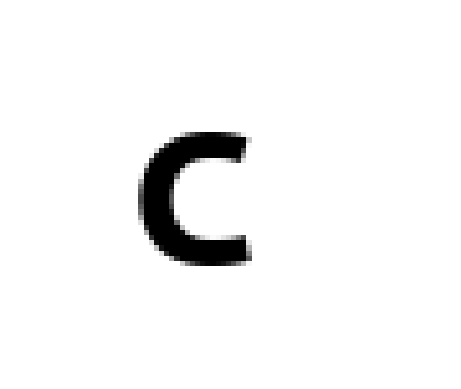

Prediksi:  C


In [11]:
# Path ke gambar yang ingin diuji
image_path = "C:/tmp/BPML/unseen_images/C_L_3472.png"

# Preprocessing gambar
input_image_tensor, processed_image = images_preprocessing(image_path)

# URL model serving
url = "http://localhost:8502/v1/models/saved_model:predict"

# Data dalam format JSON yang dikirim ke server
data = json.dumps({"instances": input_image_tensor})

# Kirim POST request ke TensorFlow Serving
response = requests.post(url, data=data)

# Memuat label dari file labels.txt
labels = []
with open('C:/tmp/BPML/tflite_model/labels.txt', 'r') as f:
    labels = [line.strip() for line in f.readlines()]
        
# Cek status response
if response.status_code == 200:
    # Ambil prediksi dari response
    predictions = response.json()["predictions"]
    # Mendapatkan kelas dengan probabilitas tertinggi
    predicted_class = tf.argmax(predictions[0]).numpy()
    print(f'Predicted class: {predicted_class}')

    # Tampilkan gambar yang diproses
    img = Image.open(image_path)
    plt.imshow(img, cmap="gray")
    plt.axis('off')  # Sembunyikan sumbu
    plt.show()

    # Print prediksi huruf
    print("Prediksi: ", labels[predicted_class])
else:
    print("Error:", response.text)